In [15]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family ='serif')
plt.rc('xtick',labelsize = 'x-large')
plt.rc('ytick',labelsize = 'x-large')

#### Question 1

In [16]:
#make grid of points st -2<x<2 and -2<y<2
Re = np.outer(np.ones(20),np.linspace(-2, 2, 20))
Im = np.outer(1j*np.linspace(-2, 2, 20), np.ones(20))
grid = Re+Im

In [17]:
vals = []
for iy, ix in np.ndindex(grid.shape):
    val = grid[iy, ix]
    vals.append(val)

In [37]:
bounded = []
diverges = []
iterations = []

def iteration(c,z0):
    """ Preforms iteration of function z_n = z_n**2 + c such that c is a complex number.
    
    Iteration is preformed on complex number than assessed if the its absolute length converges within /
    10 iterations or diverges. Results of each nature are added to arrays.
    Parameters
    ----------
    c : numpy.complex128
        Represents a number in the compelex domain of the form c = x +iy.
    
    z0 : float
        Inital estimate of the iteration.
    
    Returns
    -------
    
    """
    z_n = z0
    for n in range(0,100):
        z_n = z_n**2 + c 
    
        if abs(z_n) <= 2:
            bounded.append(c)
        
        if abs(z_n) > 2:
            diverges.append(c)
            iterations.append(n)
    return 

In [38]:
for i in vals:
    iteration(i,0)

/tmp/ipykernel_2438332/4260002586.py:24: RuntimeWarning: overflow encountered in cdouble_scalars
  z_n = z_n**2 + c
/tmp/ipykernel_2438332/4260002586.py:24: RuntimeWarning: invalid value encountered in cdouble_scalars
  z_n = z_n**2 + c


In [39]:
xxd = []
yyd = []
for p in diverges:
    xxd.append(p.real)
    yyd.append(p.imag)
    
xxb = []
yyb = []
for i in bounded:
    xxb.append(i.real)
    yyb.append(i.imag)

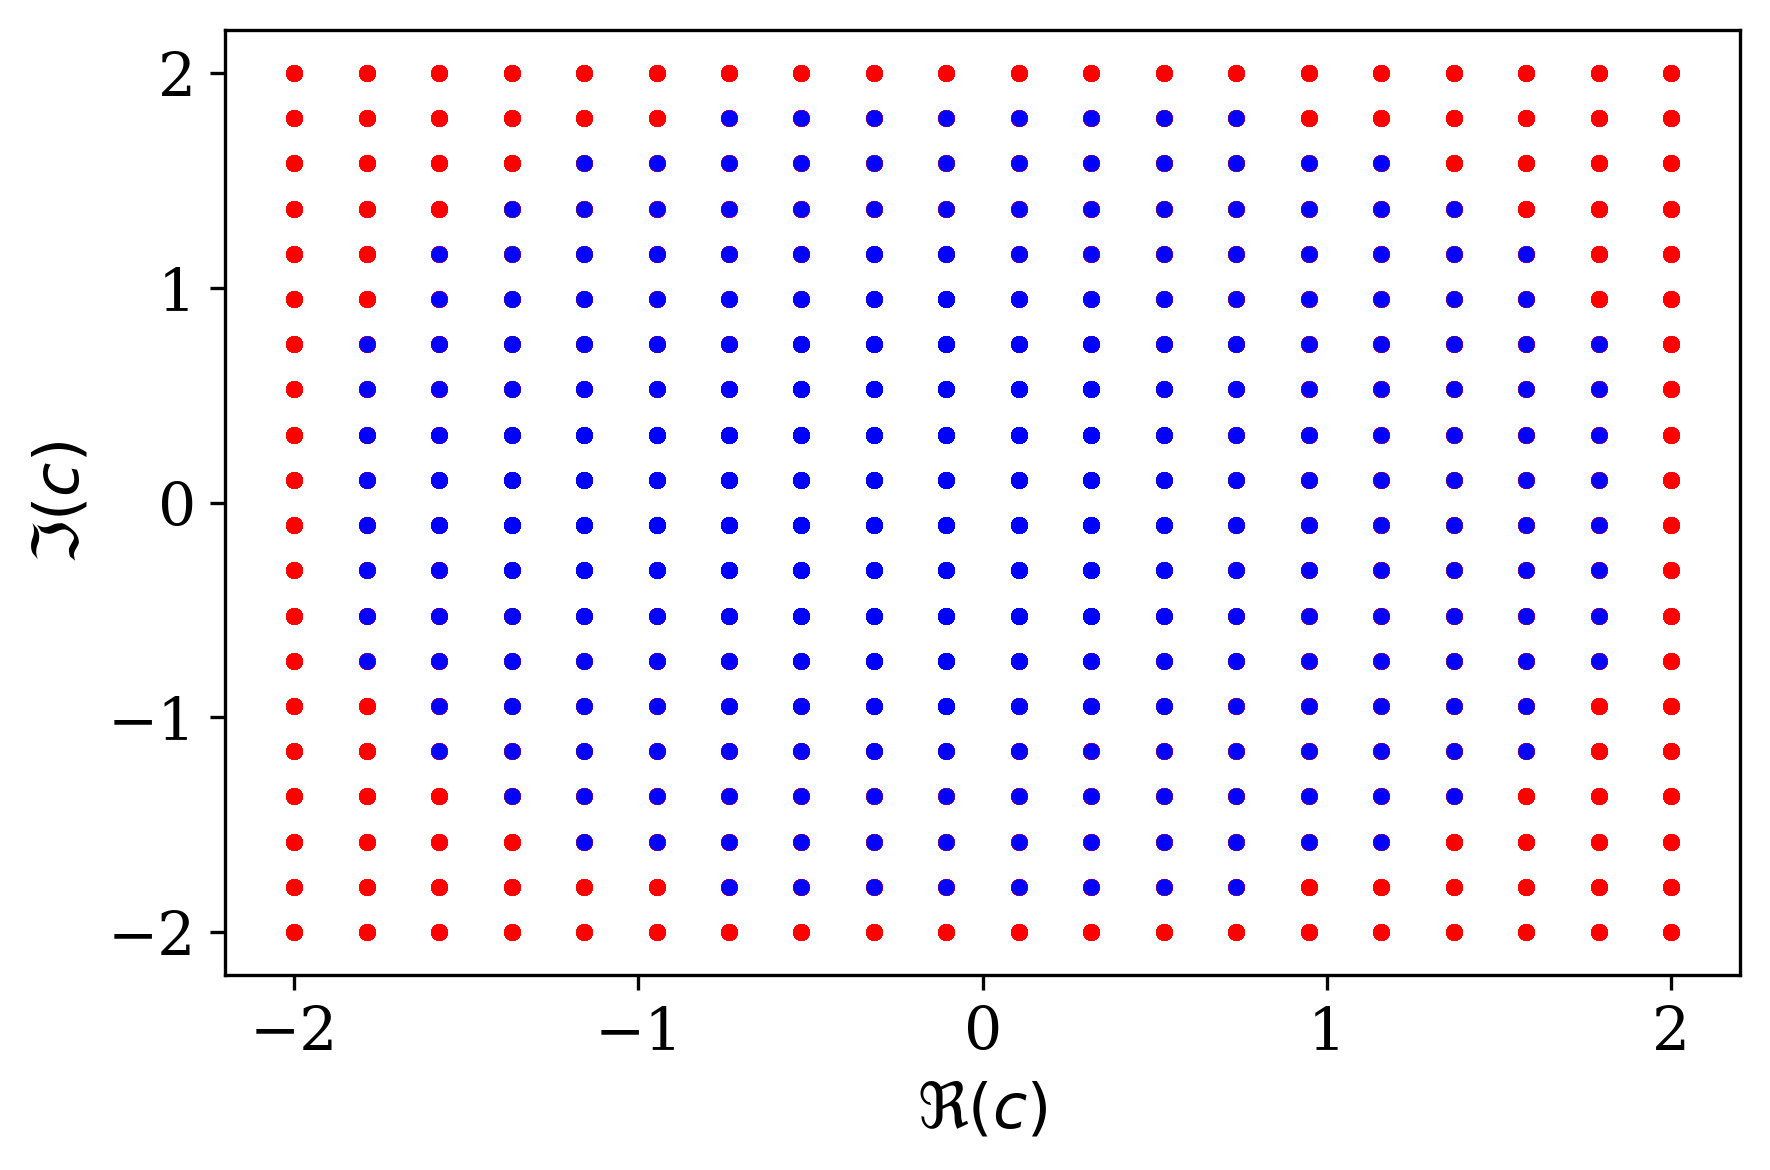

In [40]:
fig, ax = plt.subplots(1, dpi=300)

ax.plot(xxd, yyd, '.r')
ax.plot(xxb, yyb, '.b')

ax.set_xlabel(r'$\Re(c)$', fontsize = 15)
ax.set_ylabel(r'$\Im(c)$', fontsize = 15)
fig.tight_layout()

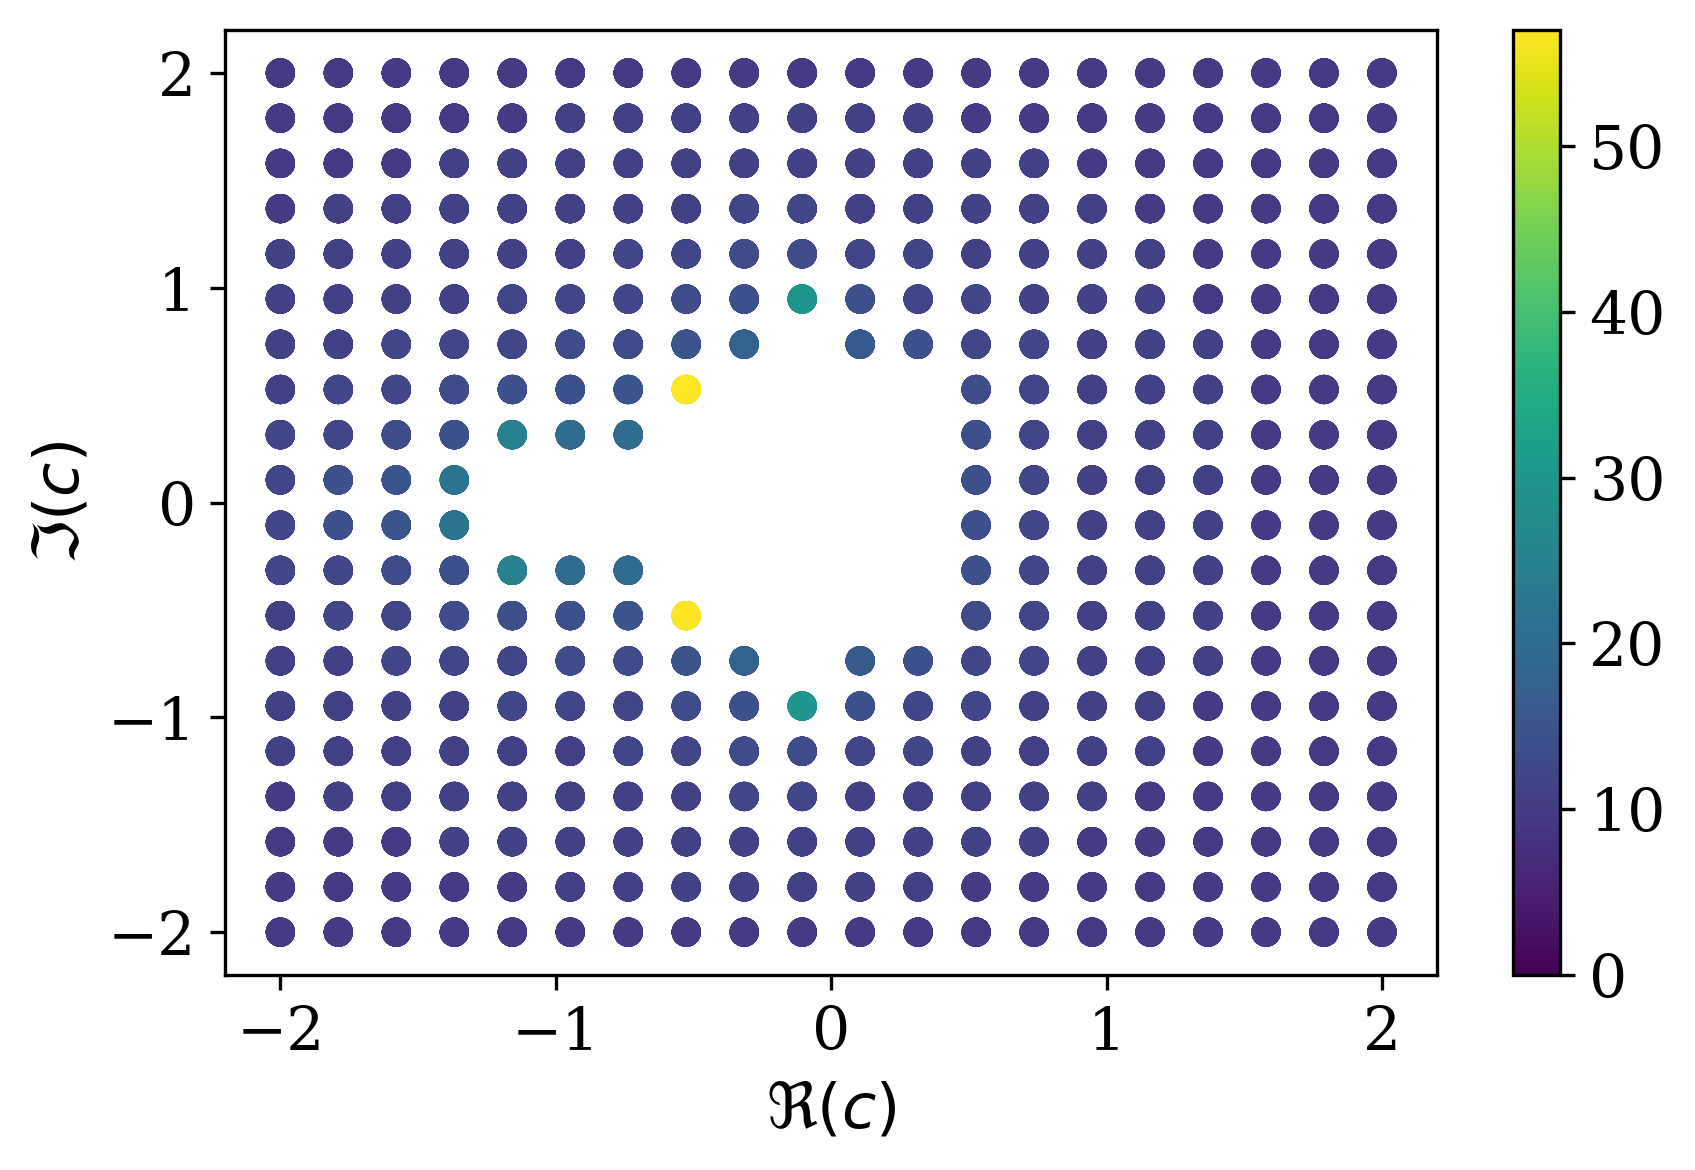

In [41]:
fig, ax = plt.subplots(1, dpi=300)
n = np.linspace(0,10,3988)
plt.scatter(xxd, yyd, c=iterations, cmap='viridis')
plt.colorbar()

ax.set_xlabel(r'$\Re(c)$', fontsize = 15)
ax.set_ylabel(r'$\Im(c)$', fontsize = 15)
fig.tight_layout()

#### Question 2

##### 2.1

In [24]:
def lorentz_eqns(t,state_vec,sigma=10.0,r=28.0,b=8.0/3.0):
    """
    Parameters
    ----------
    sigma : float
        The Prandtl number, the ratio of the kinematic viscosity /
        to the thermal diffusivity.
        
    r : float
        The Rayleigh number which depends on the vertical /
        temperature difference between the top and bottom of /
        the atmosphere.

    b : float
        Dimensionless length scale.
        
    X : float
        X component 
    
    Y : float
        Y component 
    
    Z : float
        Z component 
    
    
    """
    X,Y,Z = state_vec
    
    dX =  -sigma*(X-Y)
    dY = r*X-Y-X*Z
    dZ = -b*Z+X*Y
    
    return [dX,dY,dZ]

##### 2.2

In [25]:
# Define system parameters
sigma = 10.0
r = 28.0
b = 8.0/3.0
parameters = (sigma,r,b)

#Define Lorenz' inital conditions
W0 = [0.0,1.0,0.0]

#Define integration interval 
t_int = (0.0,60.0)
t = np.arange(0.0,60.0,0.01)

In [26]:
from scipy.integrate import solve_ivp

sol = solve_ivp(lorentz_eqns, t_int, W0, args=parameters, dense_output = True)

##### 2.3

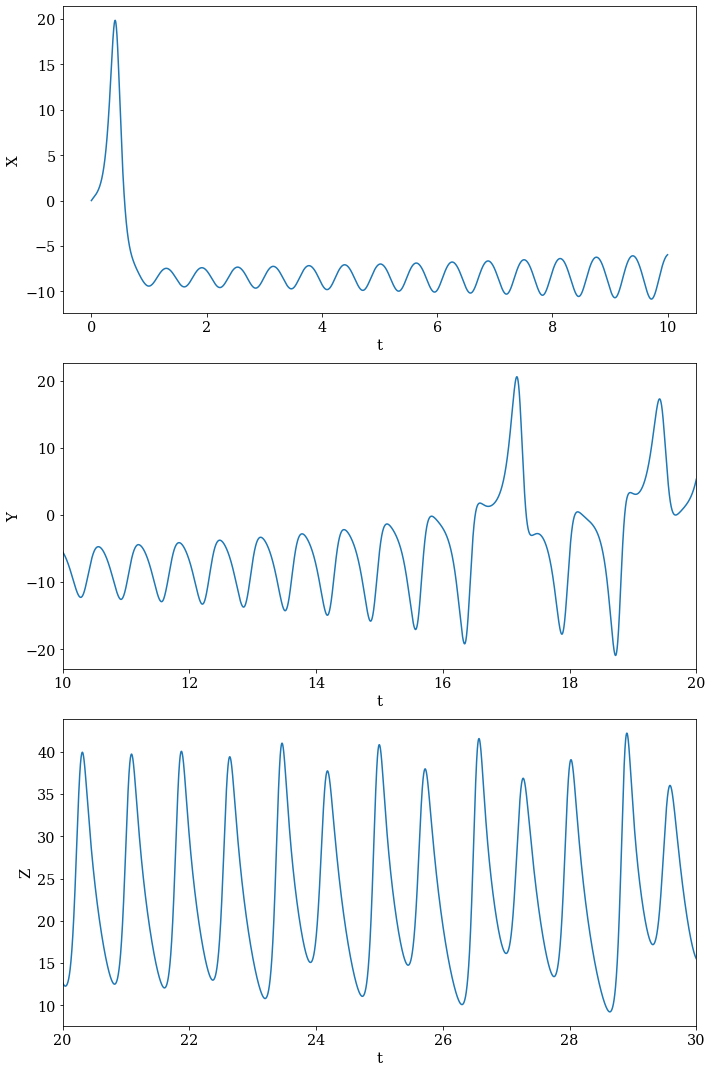

In [28]:
t1 = np.linspace(0,10,10000)
solx = sol.sol(t1)

t2 = np.linspace(10,20,10000)
soly = sol.sol(t2)

t3 = np.linspace(20,30,10000)
solz = sol.sol(t3)


fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (10,15))
ax1.plot(t1,solx[0])
ax1.set_xlabel('t', fontsize = 15)
ax1.set_ylabel('X', fontsize = 15)

ax2.plot(t2,soly[1])
ax2.set_xlabel('t', fontsize = 15)
ax2.set_ylabel('Y', fontsize = 15)
ax2.set_xlim(10,20)

ax3.plot(t3,solz[2])
ax3.set_xlabel('t', fontsize = 15)
ax3.set_ylabel('Z', fontsize = 15)
ax3.set_xlim(20,30)

fig.tight_layout()

##### 2.4

In [29]:
t_fine = np.linspace(14,19,10000)
W = sol.sol(t_fine)
X,Y,Z = W

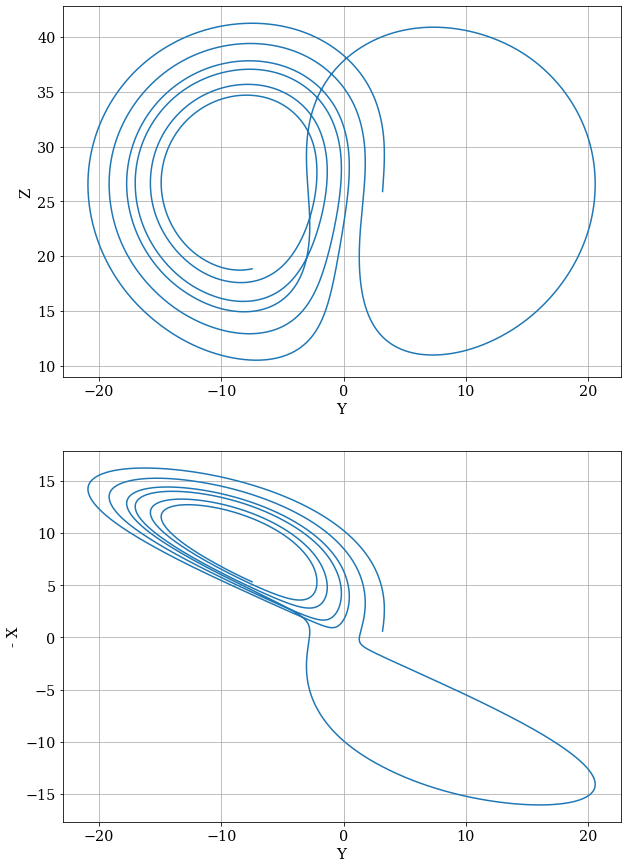

In [30]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize = (10,15))
ax1.plot(Y, Z)
ax1.set_ylabel('Z', fontsize = 15)
ax1.set_xlabel('Y', fontsize = 15)
ax1.grid()

ax2.plot(Y, -X)
ax2.set_xlabel('Y', fontsize = 15)
ax2.set_ylabel('- X', fontsize = 15)
ax2.grid()

##### 2.5

In [31]:
add = [0.0,1.0e-8,0.0] 
W0_prime = [sum(value) for value in zip(W0, add)]

In [32]:
t_fine = np.linspace(0,60,10000)
W = sol.sol(t_fine)
X,Y,Z = W

In [33]:
sol2=solve_ivp(lorentz_eqns, t_int, W0_prime, args=parameters, dense_output = True)
W0p = sol2.sol(np.linspace(0,60,10000))
Xp, Yp, Zp = W0p

In [34]:
distance_x = np.abs(Xp - X)
distance_y = np.abs(Yp - Y)
distance_z = np.abs(Zp - Z)

In [35]:
tt = np.linspace(0,60,10000)

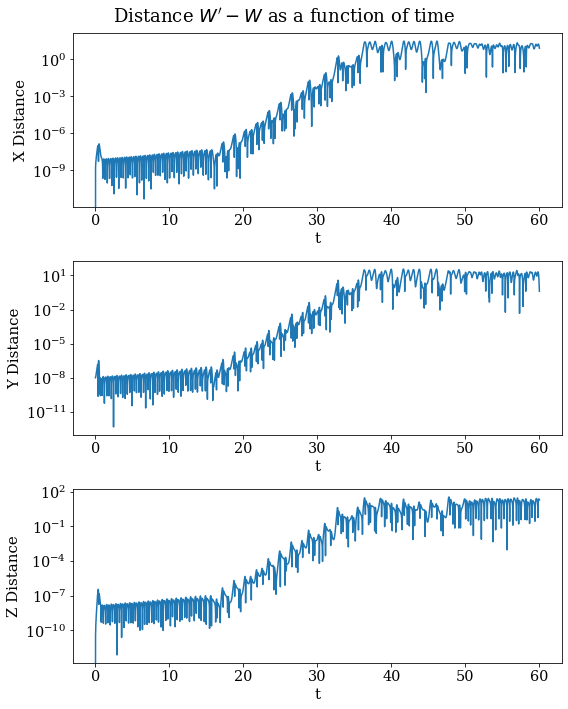

In [36]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (8,10))

ax1.plot(tt,distance_x)
ax1.set_yscale('log')
ax1.set_ylabel('X Distance', fontsize = 15)
ax1.set_xlabel('t', fontsize = 15)

ax2.plot(tt,distance_y)
ax2.set_yscale('log')
ax2.set_ylabel('Y Distance', fontsize = 15)
ax2.set_xlabel('t', fontsize = 15)

ax3.plot(tt,distance_z)
ax3.set_yscale('log')
ax3.set_ylabel('Z Distance', fontsize = 15)
ax3.set_xlabel('t', fontsize = 15)

fig.suptitle(r"Distance $W'-W$ as a function of time", fontsize = 18)

plt.tight_layout()